**Installing transformer library**

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.4 MB/s 
     |████████████████████████████████| 6.6 MB 39.0 MB/s 
     |████████████████████████████████| 120 kB 63.0 MB/s 


**Installing tokenizers**

In [2]:
pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
## plotly library works with only pyyaml 5.4.1, so it was degraded from the initial 6.0
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


**Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import logging
import itertools
import random
import warnings
import time
import os
import datetime as dt
import plotly.express as px
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Flatten
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Setting some options for general use.

stop = set(stopwords.words('english'))
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**Loading the Datasets**

In [5]:
# dataset for model training
first_data = pd.read_csv('Twitter_Data.csv')
second_data = pd.read_csv('apple-twitter-sentiment-texts.csv')
third_data = pd.read_csv('finalSentimentdata2.csv')
fourth_data = pd.read_csv('Tweets.csv')
fifth_data = pd.read_csv('train.csv')
sixth_data = pd.read_csv('test.csv')


In [6]:
## first dataset
first_data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [7]:
## renaming the header
first_data = first_data.rename(columns={'category': 'sentiment', 'clean_text': 'text'})

In [8]:
## first dataset after renaming
first_data

,text,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [9]:
## second dataset
second_data

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0
...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,@umo_games @Apple ended up getting a new compu...,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0


In [10]:
## converting to float
second_data['sentiment'] = second_data['sentiment'].map({-1: -1.0, 0: 0.0, 1:1.0})

In [11]:
## second dataset after conversion 
second_data

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1.0
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0
2,Thank u @apple I can now compile all of the pi...,1.0
3,The oddly uplifting story of the Apple co-foun...,0.0
4,@apple can i exchange my iphone for a differen...,0.0
...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1.0
1626,Finally got my iPhone 6 in the mail and it com...,-1.0
1627,@umo_games @Apple ended up getting a new compu...,0.0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0.0


In [12]:
## third dataset
third_data

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [13]:
## dropping irrelevant columns and mapping
third_data['sentiment'] = third_data['sentiment'].map({'sad': -1.0, 'anger': -1.0, 'joy':1.0})
third_data = third_data.drop(['Unnamed: 0'], axis = 1)

In [14]:
## dataset after mapping
third_data

,sentiment,text
0,-1.0,agree the poor in india are treated badly thei...
1,1.0,if only i could have spent the with this cutie...
2,1.0,will nature conservation remain a priority in ...
3,-1.0,coronavirus disappearing in italy show this to...
4,-1.0,uk records lowest daily virus death toll since...
...,...,...
3085,-1.0,today at 02 30pm a 54 year old bangladeshi mal...
3086,-1.0,corona virus i implore that you cease activity...
3087,1.0,issa date once lockdown ends inshaallah (and c...
3088,-1.0,the death toll due to covid 19 rose to 31 in j...


In [15]:
## fourth dataset
fourth_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [16]:
## removing of irrelevant columns and mapping
fourth_data = fourth_data.rename(columns ={'airline_sentiment': 'sentiment'})
fourth_data['sentiment'] = fourth_data['sentiment'].map({'negative': -1.0, 'neutral': 0.0, 'positive': 1.0})
fourth_data = fourth_data[['sentiment', 'text']]

In [17]:
## fourth dataset after removal of irrelevant column and mapping
fourth_data

,sentiment,text
0,0.0,@VirginAmerica What @dhepburn said.
1,1.0,@VirginAmerica plus you've added commercials t...
2,0.0,@VirginAmerica I didn't today... Must mean I n...
3,-1.0,@VirginAmerica it's really aggressive to blast...
4,-1.0,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,1.0,@AmericanAir thank you we got on a different f...
14636,-1.0,@AmericanAir leaving over 20 minutes Late Flig...
14637,0.0,@AmericanAir Please bring American Airlines to...
14638,-1.0,"@AmericanAir you have my money, you change my ..."


In [18]:
## fifth dataset
fifth_data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [19]:
## mapping
fifth_data['sentiment'] = fifth_data['sentiment'].map({'negative': -1.0, 'neutral': 0.0, 'positive': 1.0})
fifth_data = fifth_data[['text', 'sentiment']]

In [20]:
## dataset after mapping
fifth_data

,text,sentiment
0,"I`d have responded, if I were going",0.0
1,Sooo SAD I will miss you here in San Diego!!!,-1.0
2,my boss is bullying me...,-1.0
3,what interview! leave me alone,-1.0
4,"Sons of ****, why couldn`t they put them on t...",-1.0
...,...,...
27476,wish we could come see u on Denver husband l...,-1.0
27477,I`ve wondered about rake to. The client has ...,-1.0
27478,Yay good for both of you. Enjoy the break - y...,1.0
27479,But it was worth it ****.,1.0


In [21]:
## sixth dataset
sixth_data

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [22]:
## dataset mapping and removal of irrelevant columns
sixth_data['sentiment'] = sixth_data['sentiment'].map({'negative': -1.0, 'neutral': 0.0, 'positive': 1.0})
sixth_data = sixth_data[['text', 'sentiment']]

In [23]:
## dataset after mapping and removal of irrelevant columns
sixth_data

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,0.0
1,Shanghai is also really exciting (precisely -...,1.0
2,"Recession hit Veronique Branquinho, she has to...",-1.0
3,happy bday!,1.0
4,http://twitpic.com/4w75p - I like it!!,1.0
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",-1.0
3530,All alone in this old house again. Thanks for...,1.0
3531,I know what you mean. My little dog is sinkin...,-1.0
3532,_sutra what is your next youtube video gonna b...,1.0


In [24]:
##concatenating the six datasets
chats_data = pd.concat([first_data, second_data, third_data, fourth_data, fifth_data, sixth_data], ignore_index = True)

In [25]:
## model dataset after concatenating
chats_data

,text,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
213350,"its at 3 am, im very tired but i can`t sleep ...",-1.0
213351,All alone in this old house again. Thanks for...,1.0
213352,I know what you mean. My little dog is sinkin...,-1.0
213353,_sutra what is your next youtube video gonna b...,1.0


## Looking through the datasets and Handling Missing Values

In [26]:
## dataset info
chats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213355 entries, 0 to 213354
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       213350 non-null  object 
 1   sentiment  212547 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.3+ MB


In [27]:
## checking through for null numbers in train dataset
pd.isnull(chats_data).sum()


text           5
sentiment    808
dtype: int64

In [28]:
## removing null values in dataset
chats_data = chats_data.dropna(subset=['text', 'sentiment'], axis=0)
pd.isna(chats_data).sum()

text         0
sentiment    0
dtype: int64

In [29]:
## dataset mapping for positive, negative and neutral
chats_data['sentiment'] =  chats_data['sentiment'].map({1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'})

In [30]:
## dataset after mapping
chats_data

,text,sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
213350,"its at 3 am, im very tired but i can`t sleep ...",Negative
213351,All alone in this old house again. Thanks for...,Positive
213352,I know what you mean. My little dog is sinkin...,Negative
213353,_sutra what is your next youtube video gonna b...,Positive


**Exploratory Data Analysis**

In [31]:
## counts of sentiment
chats_data['sentiment'].value_counts()

Positive    85167
Neutral     71658
Negative    55717
Name: sentiment, dtype: int64

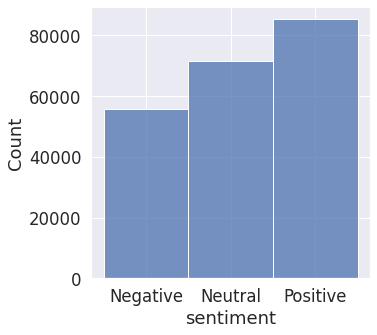

In [ ]:
## histogram showing the counts of the sentiment in the  dataset
fig= plt.figure(figsize = (5, 5))
sns.histplot(data = chats_data, x = 'sentiment')

In [ ]:
## pie chart showing the sentiment distribution
fig = px.pie(chats_data, names='sentiment', title ='Pie chart of  sentiments of tweets')
fig.show()

**Cleaning the Dataset**

In [32]:
# removing urls, emojis, html tags and punctuations.
## removing url from text
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


## removing html from text
def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

## removing punctuation from text
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying the functions
chats_data['clean_text'] = chats_data['text'].apply(lambda x: remove_URL(x))
chats_data['clean_text'] = chats_data['clean_text'].apply(lambda x: remove_html(x))
chats_data['clean_text'] = chats_data['clean_text'].apply(lambda x: remove_punct(x))


In [33]:
## text after cleaning
chats_data['clean_text']

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
213350    its at 3 am im very tired but i cant sleep  bu...
213351    All alone in this old house again  Thanks for ...
213352     I know what you mean My little dog is sinking...
213353    sutra what is your next youtube video gonna be...
213354                              omgssh  ang cute ng bby
Name: clean_text, Length: 212542, dtype: object

**Tokenizing, padding and sequencing**

In [ ]:
number_words = 7000
tokenize = Tokenizer(num_words=number_words, lower = True, split=' ')
tokenize.fit_on_texts(chats_data['clean_text'].values)
vocab_size = len(tokenize.word_index) + 1
X= tokenize.texts_to_sequences(chats_data['clean_text'].values)
X = pad_sequences(X) ## text


Y = pd.get_dummies(chats_data['sentiment']).values ## sentiments

**Data Splitting**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=1)
print('Train Set ->', X_train.shape, Y_train.shape)
print('Validation Set ->', X_val.shape, Y_val.shape)
print('Test Set ->', X_test.shape, Y_test.shape)

Train Set -> (136026, 58) (136026, 3)
Validation Set -> (34007, 58) (34007, 3)
Test Set -> (42509, 58) (42509, 3)


**Environment to build model**

In [34]:
## to silence warning
os.environ["WANDB_API_KEY"] = "0" 

In [35]:
## using the TPU in trainig 
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
    print('Number of replicas:', strategy.num_replicas_in_sync)

In [36]:
## parameter
max_features = 13000
max_words = 58
num_classes = 3

In [37]:
## dealing with randomness in results
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

**Building a Convolutional Network**

In [ ]:
## convolutional network
seed(1)
random.set_seed(1)
with strategy.scope():
  model_conv= Sequential()
  model_conv.add(Embedding(max_features,100,input_length=max_words))
  model_conv.add(Dropout(0.2))
  model_conv.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
  model_conv.add(GlobalMaxPooling1D())
  model_conv.add(Dense(128,activation='relu'))
  model_conv.add(Dropout(0.2))
  model_conv.add(Dense(num_classes,activation='softmax'))
  model_conv.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  

In [ ]:
## convolutional network model summary
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 100)           1300000   
                                                                 
 dropout (Dropout)           (None, 58, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 58, 64)            19264     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
## model training
seed(1)
random.set_seed(1)
history = model_conv.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1 , validation_data=(X_val, Y_val))

Epoch 1/10
1063/1063 [==============================] - 18s 6ms/step - loss: 0.4456 - accuracy: 0.8275 - val_loss: 0.3118 - val_accuracy: 0.8842
Epoch 2/10
1063/1063 [==============================] - 6s 5ms/step - loss: 0.2879 - accuracy: 0.8952 - val_loss: 0.3066 - val_accuracy: 0.8876
Epoch 3/10
1063/1063 [==============================] - 6s 5ms/step - loss: 0.2444 - accuracy: 0.9093 - val_loss: 0.2954 - val_accuracy: 0.8957
Epoch 4/10
1063/1063 [==============================] - 6s 5ms/step - loss: 0.2075 - accuracy: 0.9231 - val_loss: 0.3126 - val_accuracy: 0.8951
Epoch 5/10
1063/1063 [==============================] - 6s 5ms/step - loss: 0.1772 - accuracy: 0.9333 - val_loss: 0.3247 - val_accuracy: 0.8921
Epoch 6/10
1063/1063 [==============================] - 6s 5ms/step - loss: 0.1528 - accuracy: 0.9425 - val_loss: 0.3464 - val_accuracy: 0.8921
Epoch 7/10
1063/1063 [==============================] - 6s 5ms/step - loss: 0.1333 - accuracy: 0.9500 - val_loss: 0.3866 - val_accuracy

In [ ]:
## model saving after training
#model_conv.save('cnn_model.h5')

**Evaluation**

In [ ]:
## loading previously saved model after training
cnn_model = tf.keras.models.load_model('cnn_model.h5')

In [ ]:
## getting the y_pred of the convolutional neuron network
y_pred_conv = cnn_model.predict(X_test)

In [ ]:
## confusion matrix
y_pred_conv =np.argmax(y_pred_conv, axis=1)
Y_test_conv =np.argmax(Y_test, axis=1)
cm = confusion_matrix(Y_test_conv, y_pred_conv)
print(cm)

[[ 9637   821   931]
 [ 1022 12443   693]
 [  718   632 15612]]


In [ ]:
## classification report
print(classification_report(Y_test_conv, y_pred_conv))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     11389
           1       0.90      0.88      0.89     14158
           2       0.91      0.92      0.91     16962

    accuracy                           0.89     42509
   macro avg       0.88      0.88      0.88     42509
weighted avg       0.89      0.89      0.89     42509



In [ ]:
## Errors
meanAbErr = metrics.mean_absolute_error(Y_test_conv, y_pred_conv)
meanSqErr = metrics.mean_squared_error(Y_test_conv, y_pred_conv)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test_conv, y_pred_conv))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


Mean Absolute Error: 0.152108965160319
Mean Square Error: 0.2296925356983227
Root Mean Square Error: 0.47926249143691885


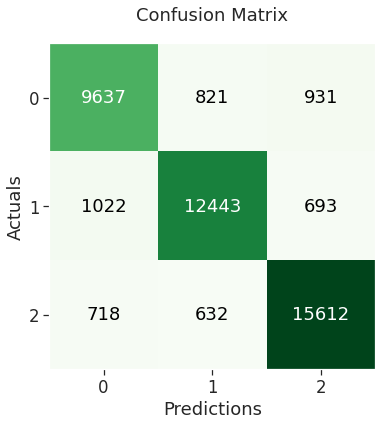

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Building a Recurrent Neural Network**

In [ ]:
## recurrent neural network (LSTM)
with strategy.scope():
  model_rec=Sequential()
  model_rec.add(Embedding(max_features,100,mask_zero=True))
  model_rec.add(LSTM(64,dropout=0.4,return_sequences=True))
  model_rec.add(LSTM(32,dropout=0.5,return_sequences=False))
  model_rec.add(Dense(num_classes,activation='softmax'))
  model_rec.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
  

In [ ]:
## model summary
model_rec.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1300000   
                                                                 
 lstm (LSTM)                 (None, None, 64)          42240     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,354,755
Trainable params: 1,354,755
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## training the recurrent network
seed(1)
random.set_seed(1)
history= model_rec.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/10
1063/1063 [==============================] - 339s 311ms/step - loss: 0.5018 - accuracy: 0.8086 - val_loss: 0.3423 - val_accuracy: 0.8770
Epoch 2/10
1063/1063 [==============================] - 327s 308ms/step - loss: 0.3310 - accuracy: 0.8797 - val_loss: 0.3128 - val_accuracy: 0.8857
Epoch 3/10
1063/1063 [==============================] - 328s 309ms/step - loss: 0.2968 - accuracy: 0.8908 - val_loss: 0.2928 - val_accuracy: 0.8939
Epoch 4/10
1063/1063 [==============================] - 328s 309ms/step - loss: 0.2706 - accuracy: 0.9013 - val_loss: 0.2853 - val_accuracy: 0.8991
Epoch 5/10
1063/1063 [==============================] - 330s 310ms/step - loss: 0.2509 - accuracy: 0.9100 - val_loss: 0.2822 - val_accuracy: 0.9034
Epoch 6/10
1063/1063 [==============================] - 325s 306ms/step - loss: 0.2340 - accuracy: 0.9162 - val_loss: 0.2750 - val_accuracy: 0.9049
Epoch 7/10
1063/1063 [==============================] - 325s 305ms/step - loss: 0.2194 - accuracy: 0.9223 - val_

In [ ]:
## saving model after training
#model_rec.save('rnn_model.h5')

In [ ]:
## loading the saved model
rnn_model = tf.keras.models.load_model('rnn_model.h5')

**Evaluation**

In [ ]:
## getting the y_pred of the convolutional neuron
y_pred_rec = rnn_model.predict(X_test)

In [ ]:
## confusion matrix
y_pred_rec =np.argmax(y_pred_rec, axis = 1)
Y_test1 = np.argmax(Y_test, axis = 1)
cm = confusion_matrix(Y_test1, y_pred_rec)
print(cm)

[[ 9831   812   746]
 [  838 12642   678]
 [  485   599 15878]]


In [ ]:
## classification report
print(classification_report(Y_test1, y_pred_rec))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     11389
           1       0.90      0.89      0.90     14158
           2       0.92      0.94      0.93     16962

    accuracy                           0.90     42509
   macro avg       0.90      0.90      0.90     42509
weighted avg       0.90      0.90      0.90     42509



In [ ]:
## errors
meanAbErr = metrics.mean_absolute_error(Y_test1, y_pred_rec)
meanSqErr = metrics.mean_squared_error(Y_test1, y_pred_rec)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test1, y_pred_rec))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


Mean Absolute Error: 0.12677315392034627
Mean Square Error: 0.18469030087746124
Root Mean Square Error: 0.42975609463678494


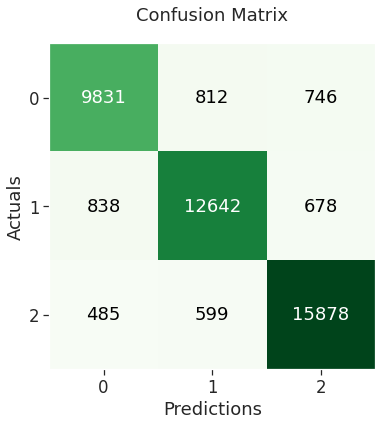

In [ ]:
## plotting the confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

________________

**Proposed Model-BERT-BILSTM-FC**

**Data Splitting**

In [38]:
## splitting to get the development data
train, test = train_test_split(chats_data, test_size = 0.20, random_state = 1)
x_train, dev = train_test_split(train, test_size=0.20, random_state=1)

In [39]:
## printing the data shapes
print(x_train.shape)
print(test.shape)
print(dev.shape)

(136026, 3)
(42509, 3)
(34007, 3)


**Label Encoder**

In [40]:
## the label consist of neutral, negative and positive
labels = chats_data.sentiment.unique().tolist()
labels

['Negative', 'Neutral', 'Positive']

In [41]:
encoder = LabelEncoder()
encoder.fit(chats_data.sentiment.tolist())

y_train = encoder.transform(train.sentiment.tolist())
y_test = encoder.transform(test.sentiment.tolist())
y_dev = encoder.transform(dev.sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_dev = y_dev.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)
print("y_dev",y_dev.shape)

y_train (170033, 1)
y_test (42509, 1)
y_dev (34007, 1)


In [42]:
# hyperparameters
max_length = 128
batch_size = 128

**Tokenization**

In [43]:
# Bert Tokenizer
seed(1)
random.set_seed(1)

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

In [44]:
def bert_encode(data):
    seed(1)
    random.set_seed(1)
    tokens = tokenizer.batch_encode_plus(data, max_length=max_length, padding='max_length', truncation=True)

    return tf.constant(tokens['input_ids'])

In [45]:
train_encoded = bert_encode(train.clean_text)
dev_encoded = bert_encode(dev.clean_text)
seed(1)
random.set_seed(1)

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_encoded, y_train))
    .shuffle(128)
    .batch(batch_size)
)

dev_dataset = (
    tf.data.Dataset
    .from_tensor_slices((dev_encoded, y_dev))
    .shuffle(128)
    .batch(batch_size)
)

**BERT-BILSTM-FC Model Building**

In [46]:
seed(1)
random.set_seed(1)
with strategy.scope():
  bert_encoder = TFBertModel.from_pretrained(model_name)
  input_word_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
  last_hidden_states = bert_encoder(input_word_ids)[0]
  x = tf.keras.layers.SpatialDropout1D(0.2)(last_hidden_states)
  x = tf.keras.layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.3)(x)
  outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
  model = tf.keras.Model(input_word_ids, outputs)
  adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
  model.compile(loss='sparse_categorical_crossentropy',optimizer=adam_optimizer,metrics=['accuracy'])

    

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [47]:
## model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 128)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             128, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

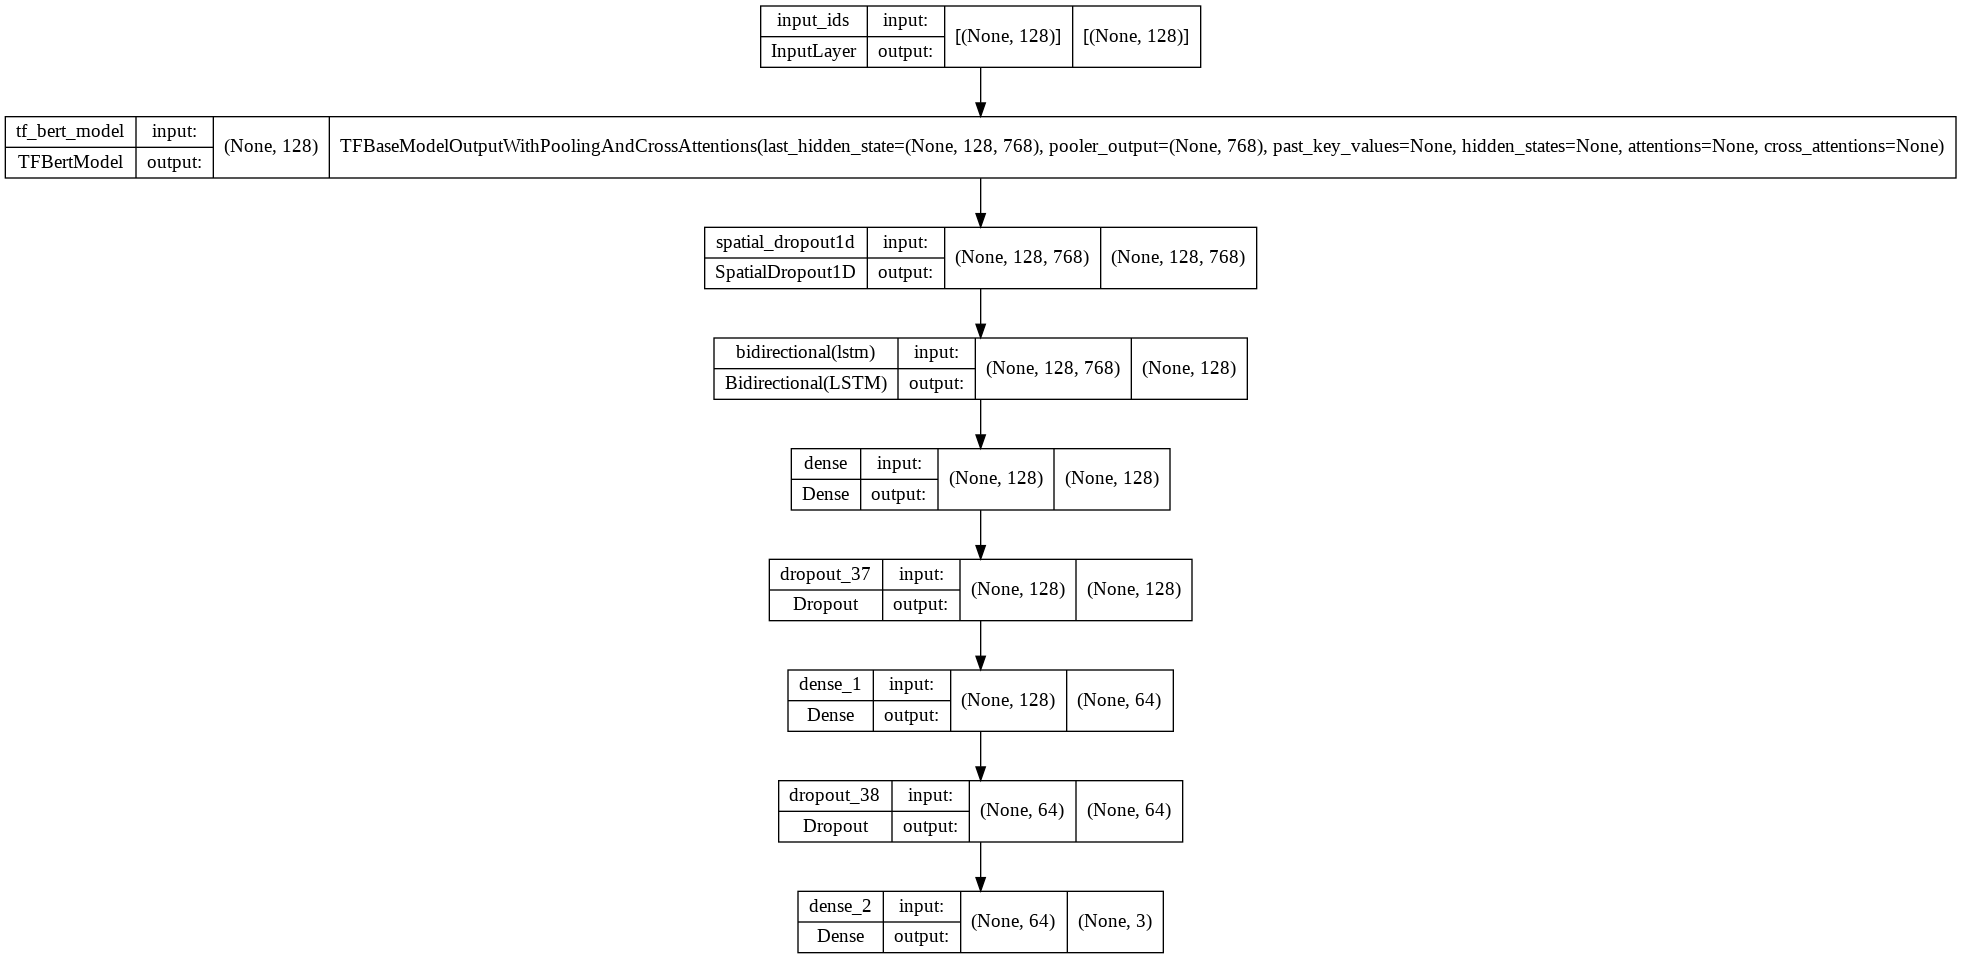

In [48]:
## model plotting
tf.keras.utils.plot_model(model, show_shapes=True)

**Model Training**

In [49]:
seed(1)
random.set_seed(1)
history = model.fit(
    train_dataset,
    batch_size=batch_size,
    epochs=10,
    validation_data=dev_dataset, verbose = 1)
    

Epoch 1/10


1329/1329 [==============================] - 466s 270ms/step - loss: 0.5541 - accuracy: 0.7792 - val_loss: 0.2933 - val_accuracy: 0.9021
Epoch 2/10
1329/1329 [==============================] - 283s 213ms/step - loss: 0.2859 - accuracy: 0.9020 - val_loss: 0.2051 - val_accuracy: 0.9299
Epoch 3/10
1329/1329 [==============================] - 284s 213ms/step - loss: 0.2202 - accuracy: 0.9240 - val_loss: 0.1549 - val_accuracy: 0.9453
Epoch 4/10
1329/1329 [==============================] - 285s 215ms/step - loss: 0.1790 - accuracy: 0.9372 - val_loss: 0.1253 - val_accuracy: 0.9555
Epoch 5/10
1329/1329 [==============================] - 284s 214ms/step - loss: 0.1518 - accuracy: 0.9464 - val_loss: 0.1014 - val_accuracy: 0.9642
Epoch 6/10
1329/1329 [==============================] - 284s 214ms/step - loss: 0.1304 - accuracy: 0.9544 - val_loss: 0.0799 - val_accuracy: 0.9731
Epoch 7/10
1329/1329 [==============================] - 284s 213ms/step - loss: 0.1104 - accuracy: 0.9619 - val_loss: 0.063

In [50]:
## weight saving 
model.save_weights('sentiment_weights.h5')

# Evaluate

In [51]:
test_encoded = bert_encode(test.clean_text)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(test_encoded)
    .batch(batch_size)
)

predicted_chats = model.predict(test_dataset, batch_size=batch_size)


In [52]:
y_pred = []
for i in range(predicted_chats.shape[0]):
    y_pred.append(np.argmax(predicted_chats[i]))

In [53]:
## classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11389
           1       0.91      0.93      0.92     14158
           2       0.97      0.94      0.95     16962

    accuracy                           0.93     42509
   macro avg       0.93      0.93      0.93     42509
weighted avg       0.93      0.93      0.93     42509



In [54]:
## errors
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


Mean Absolute Error: 0.08007716013079583
Mean Square Error: 0.10698910818885413
Root Mean Square Error: 0.327091895633099


In [55]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10457   695   237]
 [  600 13237   321]
 [  335   644 15983]]


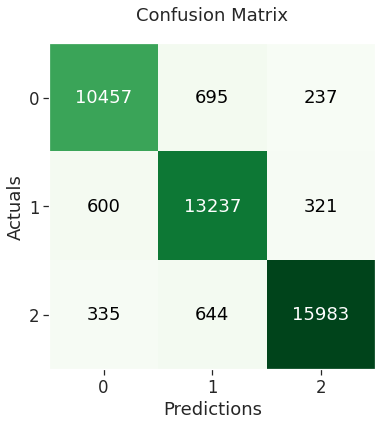

In [56]:
##plotting the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Prediction**

In [57]:
def decode_sentiment(score):
    if score == 0:
        return "negative"
    elif score == 1:
        return "neutral"
    else:
        return "positive"

In [59]:
text = input("Please input your text or review: ")
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_encoded = bert_encode([text])
    # Predict
    score = model.predict([x_encoded])[0]
    # Decode sentiment
    label = decode_sentiment(np.argmax(score))

    return {"label": label, "score": score,
            "elapsed_time": time.time() - start_at}
predict(text)

Please input your text or review: i love love


{'label': 'positive',
 'score': array([1.8207271e-05, 1.4041204e-04, 9.9984133e-01], dtype=float32),
 'elapsed_time': 0.7184081077575684}